In [ ]:
import torch
import fastai
print(torch.__version__)
print(fastai.__version__)

#

2.4.0+cu121
2.7.17


In [ ]:
! pip install fastai==2.7.160

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422 (from 1)
Receiving objects: 100% (422/422), 34.08 MiB | 15.94 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1


In [ ]:
! cd OIDv4_ToolKit && python main.py -h

usage: main.py [-h] [--Dataset /path/to/OID/csv/] [-y]
               [--classes list of classes [list of classes ...]]
               [--type_csv 'train' or 'validation' or 'test' or 'all']
               [--sub Subset of human verified images or machine generated (h or m)]
               [--image_IsOccluded 1 or 0] [--image_IsTruncated 1 or 0] [--image_IsGroupOf 1 or 0]
               [--image_IsDepiction 1 or 0] [--image_IsInside 1 or 0]
               [--multiclasses 0 (default) or 1] [--n_threads [default 20]] [--noLabels]
               [--limit integer number]
               <command> 'downloader', 'visualizer' or 'ill_downloader'.

Open Image Dataset Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
                        'downloader', 'visualizer' or 'ill_downloader'.

options:
  -h, --help            show this help message and exit
  --Dataset /path/to/OID/csv/
                        Directory of the OID dataset folder
  -y, --yes

In [ ]:
! cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 26493 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets
from IPython.display import display

In [ ]:
#Path
path = Path('train')
fls=get_image_files(path)
fls
failed=verify_images(fls)
failed

(#0) []

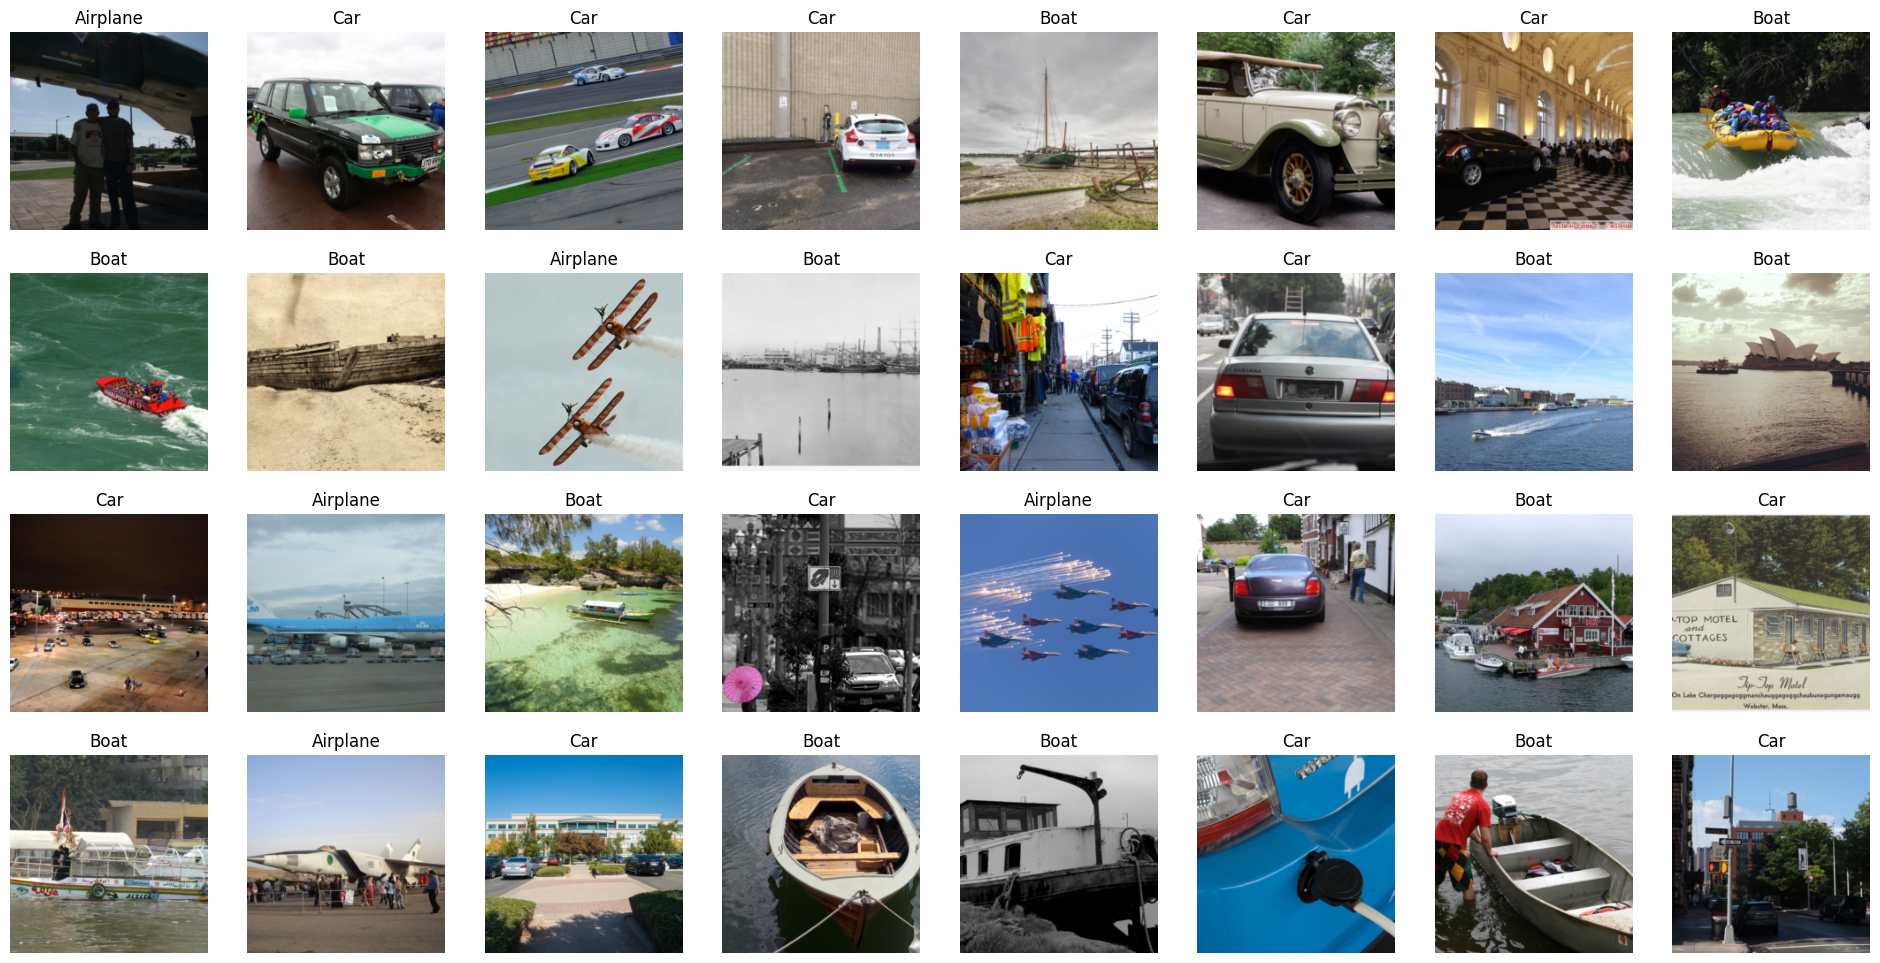

In [ ]:
#Datablock creation
transports=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
    )

# Dataloader yaratamiz

dls=transports.dataloaders(path)

#checking dataset

dls.valid.show_batch(max_n=32,nrows=4)

In [ ]:
#Training the data

learn=cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 133MB/s]


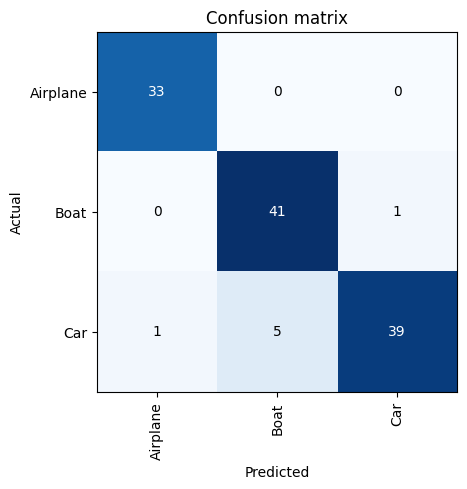

In [ ]:
#tekshirish
interpretation=ClassificationInterpretation.from_learner(learn)
interpretation.plot_confusion_matrix()

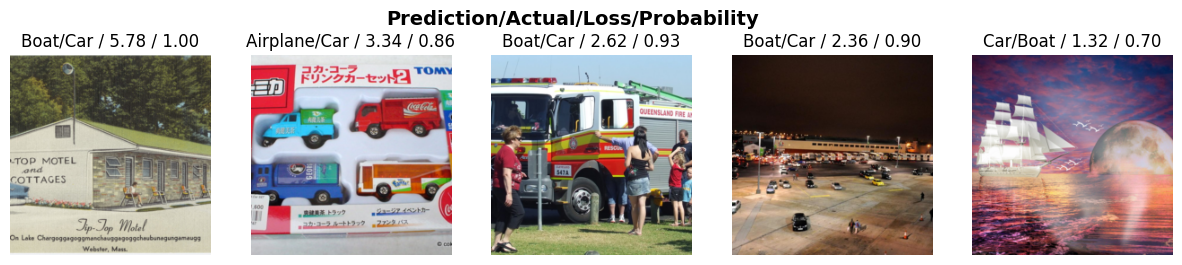

In [ ]:
interpretation.plot_top_losses(5,nrows=1)

In [ ]:
upload=widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Prediction: Car; Probability: 1.0000


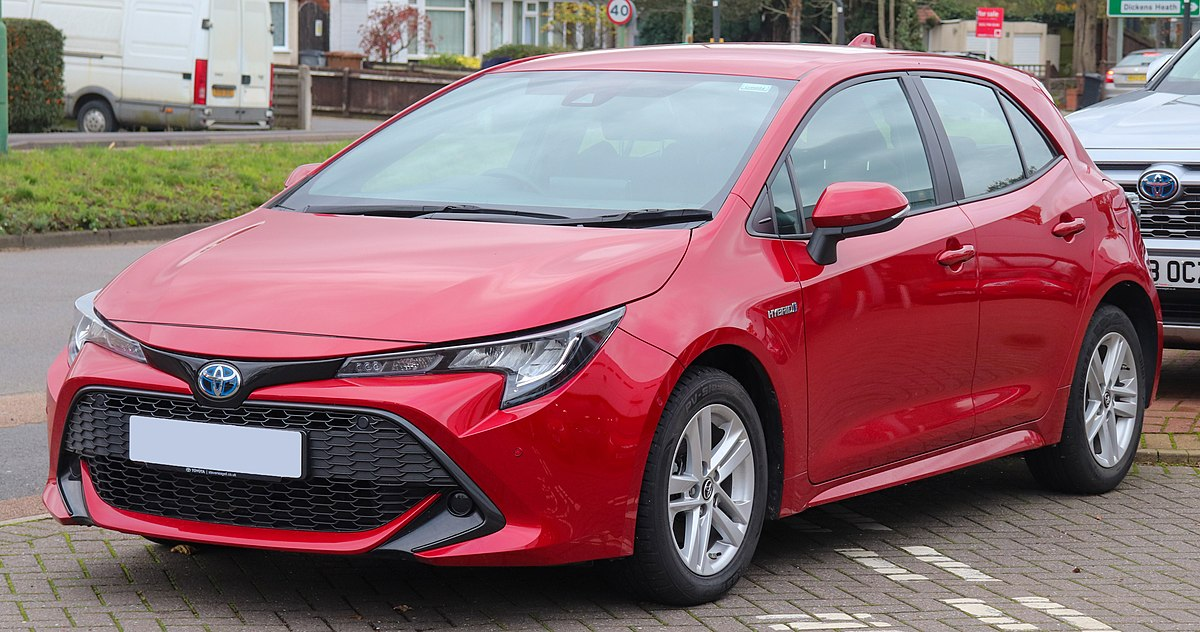

In [ ]:
Img = PILImage.create(upload.data[-1])
pred, pred_idx, probs = learn.predict(Img)
print(f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}")
Img

In [ ]:
learn.export('transports.pkl')

In [ ]:
#O'qitilgan modelni chaqirib olamiz

model = load_learner('/content/transports.pkl')

In [ ]:
model.predict(Img)


('Car', tensor(2), tensor([2.9757e-08, 1.8872e-07, 1.0000e+00]))